<a href="https://colab.research.google.com/github/komorimasashi/kakuritsu_toukei_1/blob/main/6th_lec_mean_variance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 代表値とばらつきの指標

##概要

**目的**

平均値，中央値などの代表値を求める．またばらつきの指標として標準偏差を求める．


**今回使うライブラリ**

*   NumPy：数値・ベクトル・行列演算ライブラリ

Numpyは配列(リスト)計算を高速にするためのPythonのライブラリです．Pythonには標準の機能としてリスト型変数がありますが、Numpyはこれを強化したNumpy配列というものを使います．NumpyはCで実装されており，処理が高速なので，大量のデータを扱うデータサイエンスの領域では必須のライブラリです．


##Numpyの基本的な使い方

（ここは興味のない人は飛ばしてもらっていいです）

###Numpyライブラリの読み込み
ライブラリを読み込んで使える状態にするには，**import** を使います．**import** モジュール名（numpy）でモジュールを読み込んでおり、**as** で短い名前をつけます（ここではnp；numpyをnpと省略するのは一般的なルールなので勝手な略称をつけないように）．これで「np」という名前をつければNumpyの関数を使うことができるようになりました．

In [ ]:
# numpyモジュールの読み込み
import numpy as np

まずは，1から10までの配列を作成してみます．np.と後にarrayをつけることで，Numpyのインスタンスとして配列sample_numpy_data を作っています．sample_numpy_data はNumpyのインスタンスなので，Numpyの持つ様々な機能（メソッドと言われます）を使うことができます．

(数字が綺麗に並んでないですが、後から並び替えをするためにわざと作っています)．

In [ ]:
# 配列の作成
sample_numpy_data = np.array([9,2,3,4,10,6,7,8,1,5])
sample_numpy_data

array([ 9,  2,  3,  4, 10,  6,  7,  8,  1,  5])

これはnumpy.ndarrayという型であることがわかります

In [ ]:
#nd　　arrayはnumpyの多次元データを扱う型
type(sample_numpy_data)

numpy.ndarray

###Numpyのメソッドを使う

dtype, ndim, sizeといったNumpyのメソッド（クラスで定義されている処理）を使うことで，データの中身を見ることができます．

使い方は，「インスタンス名.（ピリオド）メソッド」という書き方をします．

In [ ]:
# データの型
print(sample_numpy_data.dtype)
# 次元数
print(sample_numpy_data.ndim)
# 要素数
print(sample_numpy_data.size)

int64
1
10


次にsort()というメソッドを使ってみましょう．sort()は並び替えの処理を行います．並び替え処理を行った後は，数字が昇順に整列されていることを確認しましょう．

In [ ]:
print("そのまま：",sample_numpy_data)

# ソート
sample_numpy_data.sort()

print("ソート後：",sample_numpy_data)


そのまま： [ 9  2  3  4 10  6  7  8  1  5]
ソート後： [ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
# 最小値
print("Min:",sample_numpy_data.min())
# 最大値
print("Max:",sample_numpy_data.max())
# 合計
print("Sum:",sample_numpy_data.sum())
# 積み上げ
print("Cum:",sample_numpy_data.cumsum())

Min: 1
Max: 10
Sum: 55
Cum: [ 1  3  6 10 15 21 28 36 45 55]


###行列を扱う

In [ ]:
#まずは要素が 1, 2, 3 である長さ 3 のベクトル
a = np.array([1, 2, 3])
print(a)

[1 2 3]


次にこんな行列を作ってみましょう
\begin{pmatrix}
1 & 2 &3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{pmatrix}


In [ ]:
b = np.array([[1, 2, 3], [4, 5,6],[7, 8, 9]])
print(b)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


numpy.ndarrayを作る方法はnp.array()以外にも色々あります．
例えば，np.zeros() はそれぞれ要素が全て 0 である0行列を生成する関数です．

In [ ]:
#すべての要素が0の行列
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

np.identity()は単位行列を生成する関数です．n は行列の大きさを表します． 例えば3 と指定すると，単位行列は正方行列なので，大きさ 3×3 の単位行列が生成されます．

In [ ]:
#単位行列
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
#数列を生成する
np.arange(9)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
#後ろにさらにメソッドを重ねることもできます
#reshapeは行列に変換するメソッドです
np.arange(9).reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
#さらにこの行列のある部分だけを取り出すこともできます
#0行目だけを取り出す（pythonは0からカウントするので実際には1行目）
print(np.arange(9).reshape(3,3)[0,:])

[0 1 2]


In [ ]:
#0列目だけを取り出す（実際には1列目）
print(np.arange(9).reshape(3,3)[:,0])

[0 3 6]


In [ ]:
#"0:2"(コロン)は「0番目の要素から２番目の要素の手前(つまり１番目)まで取り出す
print(np.arange(9).reshape(3,3)[:,0:2])

[[0 1]
 [3 4]
 [6 7]]


In [ ]:
#行列を生成する際に変数の型を指定することができます
a = np.array([1, 2, 3], dtype=float)
print("aの型は",a.dtype)

b = np.array([1, 2, 3], dtype=int)
print("bの型は",b.dtype)

aの型は float64
bの型は int64


###行列の演算


行列の掛け算では，np.dotを使います．なお，*を使うとそれぞれの要素を掛け算するだけなので，間違えないように注意しましょう

In [ ]:
# 行列の積
sample_multi_array_data1 = np.arange(0,9).reshape(3,3)
sample_multi_array_data2 =  np.arange(9,18).reshape(3,3)
np.dot(sample_multi_array_data1,sample_multi_array_data2)

array([[ 42,  45,  48],
       [150, 162, 174],
       [258, 279, 300]])

In [ ]:
# 要素の積(注：行列の掛け算ではありません)
sample_multi_array_data1 * sample_multi_array_data2

array([[  0,  10,  22],
       [ 36,  52,  70],
       [ 90, 112, 136]])

###list型からnp.array型への変換

In [ ]:
data0 = range(10) # 注意

data1 = []
for x in range(10):
    data1.append(x)

data2 = [x for x in range(10)] # Python 特有の書き方
data3 = np.array(range(10)) # range => numpy.ndarray 変換
data4 = np.array(data2) # list => numpy.ndarray 変換

print (type(data0), data0)
print (type(data1), data1)
print (type(data2), data2)
print (type(data3), data3)
print (type(data4), data4)

<class 'range'> range(0, 10)
<class 'list'> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
<class 'list'> [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6 7 8 9]
<class 'numpy.ndarray'> [0 1 2 3 4 5 6 7 8 9]


## Numpyで求める代表値，ばらつきの指標

ライブラリを読み込んで使える状態にするには，import を使います．import モジュール名（numpy）でモジュールを読み込んでおり、as で短い名前をつけます（ここではnp；numpyをnpと省略するのは一般的なルールなので勝手な略称をつけないように）．これで「np」という名前をつければNumpyの関数を使うことができるようになりました．

In [ ]:
# numpyモジュールの読み込み
import numpy as np

numpyで使える配列を作成します．
np.と後にarrayをつけることで，Numpyのインスタンスとして配列（`ndarray`と呼ばれる）であるcommuting_timeを作っています．commuting_time はNumpyのインスタンスなので，Numpyの持つ様々な機能（メソッドと言われます）を使うことができます．


In [ ]:
#データ読込（通学時間）
commuting_time = np.array([60,110,90,90,105,120,75,70,130,45,20,120,80,90,90,5,50,
                            100,80,10,10,15,60,90,70,60,40,70,30,150,90,80,7,90,36,80,
                            110,50,30,60,70,90,150,90,120,90,100,60,100,45,90,70,90,
                            30,90,90,130,140,90,70,70,120,90,30,120,40,90,60,40,4,10,
                            90,90,70,20,30,60,30,120,50,110,60,90,10,90,50,120,30,100,
                            120,90,60,90,15,110,100,80,10,120,90,80,70,60,20,120,120,
                            80,20,5,90,60,60,100,75,90,15,10,90,100,70,80,120,90,90,
                            100,80,60,95,90,20,50,100,70,70,120,120,60,80,30,20,100,
                            30,60,25,120,75,50,120,30,90,180,150
        ])

Numpyのメソッド（クラスで定義されている処理）を使うことで，データの中身を見ることができます．
使い方は，「インスタンス名.（ピリオド）メソッド」という書き方をします．

numpy.sum(): 合計

In [ ]:
commuting_time.sum()

11262

In [ ]:
#下のように書くこともできる（結果は同じ）
np.sum(commuting_time)

11262

numpy.mean(): 平均値: $$\overline{x}=\frac{1}{N}\sum_{i=1}^Nx_i $$

In [ ]:
commuting_time.mean()

74.09210526315789

numpy.var(): 分散
$$\sigma^2 = {\frac{1}{N}\sum_{i=1}^N (x_i - \overline{x})^2}$$

In [ ]:
commuting_time.var()

1322.7678324099722

numpy.std():  standard deviation（標準偏差） $$\sigma = \sqrt{\frac{1}{N}\sum_{i=1}^N (x_i - \overline{x})^2}$$

In [ ]:
commuting_time.std()

36.36987534223856

numpy.percentile():　第1四分位，第２四分位（中央値），第3四分位

numpy.min(): 最小値 / numpy.max(): 最大値

*   min: 最小値
*   25%: 第1四分位偏差（25パーセンタイル）
*   50%: median（メディアン；中央値）
*   75%: 第3四分位偏差（75パーセンタイル）
*   max: 最大値


In [ ]:
print(commuting_time.min())
q25, q50, q75 = np.percentile(commuting_time, [25, 50, 75])
print(q25)
print(q50)
print(q75)
print(commuting_time.max())

4
50.0
80.0
96.25
180


## 範囲と四分位偏差と標準偏差の違い

先程の通学時間データの配列をxに代入します．これでxもNumpyの配列に自動的になります．


In [ ]:
x = commuting_time

####範囲

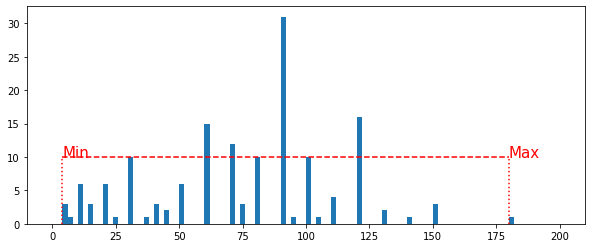

In [ ]:
import matplotlib.pyplot as plt

#(0,200)の区間を100分割した区間でヒストグラムを書く

plt.figure(figsize=(10,4))
plt.hist(x, bins=100,range=(0,200))

plt.vlines(x.min(), 0, 10, "red", linestyles='dotted')
plt.vlines(x.max(), 0, 10, "red", linestyles='dotted')
plt.text(x.min(), 10, "Min", size = 15, color = "red")
plt.text(x.max(), 10, "Max", size = 15, color = "red")
plt.hlines(10, x.min(), x.max(), "red", linestyles='dashed')


####四分位範囲

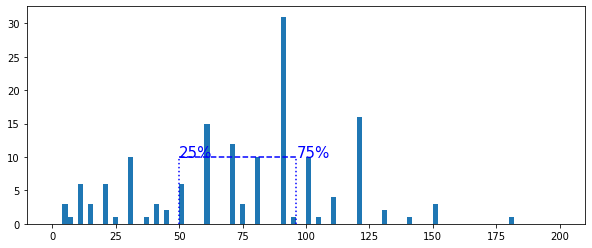

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(x, bins=100,range=(0,200))
#25, 75パーセンタイル（第1四分位，第3四分位）を求める
q75, q25 = np.percentile(x, [75 ,25])

plt.vlines(q25, 0, 10, "blue", linestyles='dotted')
plt.vlines(q75, 0, 10, "blue", linestyles='dotted')
plt.text(q25, 10, "25%", size = 15, color = "blue")
plt.text(q75, 10, "75%", size = 15, color = "blue")
plt.hlines(10, q25, q75, "blue", linestyles='dashed')


####標準偏差

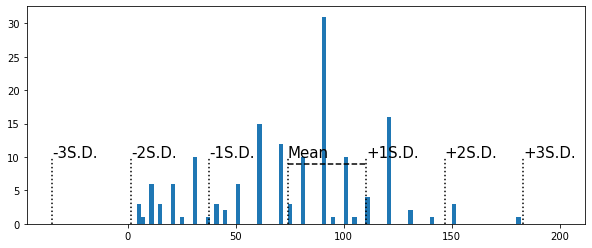

In [ ]:
plt.figure(figsize=(10,4))
plt.hist(x, bins=100,range=(0,200))

plt.vlines(x.mean(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean(), 10, "Mean", size = 15, color = "black")

plt.vlines(x.mean()+x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()+x.std(), 10, "+1S.D.", size = 15, color = "black")

plt.vlines(x.mean()+2*x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()+2*x.std(), 10, "+2S.D.", size = 15, color = "black")

plt.vlines(x.mean()+3*x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()+3*x.std(), 10, "+3S.D.", size = 15, color = "black")

plt.vlines(x.mean()-x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()-x.std(), 10, "-1S.D.", size = 15, color = "black")

plt.vlines(x.mean()-2*x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()-2*x.std(), 10, "-2S.D.", size = 15, color = "black")

plt.vlines(x.mean()-3*x.std(), 0, 10, "black", linestyles='dotted')
plt.text(x.mean()-3*x.std(), 10, "-3S.D.", size = 15, color = "black")

plt.hlines(9, x.mean(), x.mean()+x.std(), "black", linestyles='dashed')
